In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import emoji
from emosent import get_emoji_sentiment_rank

In [87]:
train_dataset_path = "datasets/train_task_b_full.txt"
test_dataset_path = "datasets/test_task_b_full.txt"

In [88]:
train_df = pd.read_csv(train_dataset_path, sep="\t")
train_df.rename(columns={"Tweet Index": "index", "Label": "label", "Tweet text": "text"},
                inplace=True)

test_df = pd.read_csv(test_dataset_path, sep="\t")
test_df.rename(columns={"Tweet index": "index", "Label": "label", "Tweet text": "text"},
               inplace=True)

C:\Users\andri\Projects\FER-TAR\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='label'>

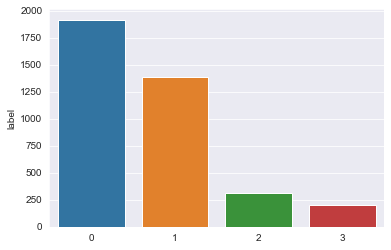

In [89]:
value_counts = train_df["label"].value_counts()
sns.barplot(value_counts.index, value_counts)

In [90]:
train_df["word_count"] = train_df["text"].apply(lambda x: len(x.split()))

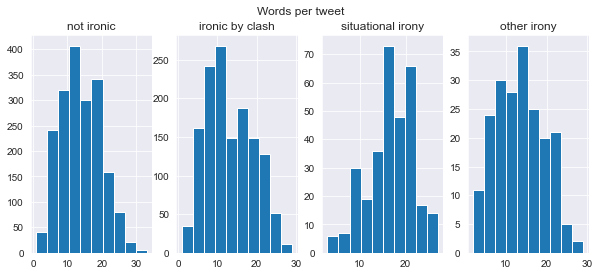

In [91]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 4))
fig.suptitle("Words per tweet")

train_emojis = train_df[train_df["label"] == 0]
train_emojis = train_emojis[train_emojis["word_count"] < 50]["word_count"]
ax1.hist(train_emojis)
ax1.set_title("not ironic")

train_emojis = train_df[train_df["label"] == 1]
train_emojis = train_emojis[train_emojis["word_count"] < 50]["word_count"]
ax2.hist(train_emojis)
ax2.set_title("ironic by clash")

train_emojis = train_df[train_df["label"] == 2]
train_emojis = train_emojis[train_emojis["word_count"] < 50]["word_count"]
ax3.hist(train_emojis)
ax3.set_title("situational irony")

train_emojis = train_df[train_df["label"] == 3]
train_emojis = train_emojis[train_emojis["word_count"] < 50]["word_count"]
ax4.hist(train_emojis)
ax4.set_title("other irony")

plt.show()

In [92]:
print("mean word count not ironic: ", train_df[train_df["label"] == 0]["word_count"].mean())
print("mean word count ironic by clash: ", train_df[train_df["label"] == 1]["word_count"].mean())
print("mean word count situational irony: ", train_df[train_df["label"] == 2]["word_count"].mean())
print("mean word count other irony: ", train_df[train_df["label"] == 3]["word_count"].mean())

mean word count not ironic:  13.916492693110648
mean word count ironic by clash:  13.02241503976862
mean word count situational irony:  16.645569620253166
mean word count other irony:  13.51980198019802


In [93]:
def extract_emojis(text):
    return "".join(c for c in text if c in emoji.UNICODE_EMOJI['en'])


def has_emojis(text):
    return len(extract_emojis(text)) == 0


def get_emoji_sentiment_score(emoji):
    try:
        return get_emoji_sentiment_rank(emoji)["sentiment_score"]
    except KeyError:
        return None


def get_mean_emoji_sentiment_score(emojis):
    if len(emojis) == 0:
        return np.nan

    scores = [get_emoji_sentiment_score(e) for e in emojis]
    scores = [s for s in scores if s is not None]
    return np.mean(scores)

In [94]:
train_df["emojis"] = train_df["text"].apply(extract_emojis)
train_df["emoji_count"] = train_df["emojis"].apply(lambda x: len(x))
train_df["emoji_sentiment_scores"] = train_df["emojis"].apply(get_mean_emoji_sentiment_score)

test_df["emojis"] = test_df["text"].apply(extract_emojis)
test_df["emoji_count"] = test_df["emojis"].apply(lambda x: len(x))
test_df["emoji_sentiment_scores"] = test_df["emojis"].apply(get_mean_emoji_sentiment_score)

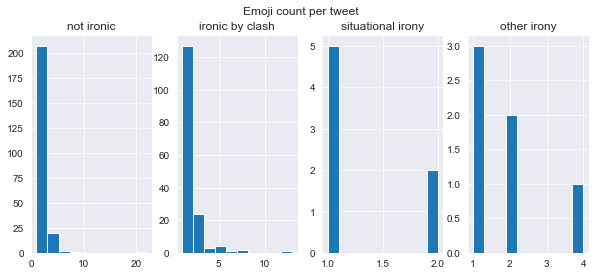

In [95]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 4))
fig.suptitle("Emoji count per tweet")

train_emojis = train_df[train_df["label"] == 0]
train_emojis = train_emojis[train_emojis["emoji_count"] > 0]["emoji_count"]
ax1.hist(train_emojis)
ax1.set_title("not ironic")

train_emojis = train_df[train_df["label"] == 1]
train_emojis = train_emojis[train_emojis["emoji_count"] > 0]["emoji_count"]
ax2.hist(train_emojis)
ax2.set_title("ironic by clash")

train_emojis = train_df[train_df["label"] == 2]
train_emojis = train_emojis[train_emojis["emoji_count"] > 0]["emoji_count"]
ax3.hist(train_emojis)
ax3.set_title("situational irony")

train_emojis = train_df[train_df["label"] == 3]
train_emojis = train_emojis[train_emojis["emoji_count"] > 0]["emoji_count"]
ax4.hist(train_emojis)
ax4.set_title("other irony")

plt.show()

In [96]:
print("emoji count not ironic: ", train_df[train_df["label"] == 0]["emoji_count"].mean())
print("emoji count ironic by clash: ", train_df[train_df["label"] == 1]["emoji_count"].mean())
print("emoji count situational irony: ", train_df[train_df["label"] == 2]["emoji_count"].mean())
print("emoji count other irony: ", train_df[train_df["label"] == 3]["emoji_count"].mean())

emoji count not ironic:  0.23799582463465555
emoji count ironic by clash:  0.2198120028922632
emoji count situational irony:  0.028481012658227847
emoji count other irony:  0.054455445544554455


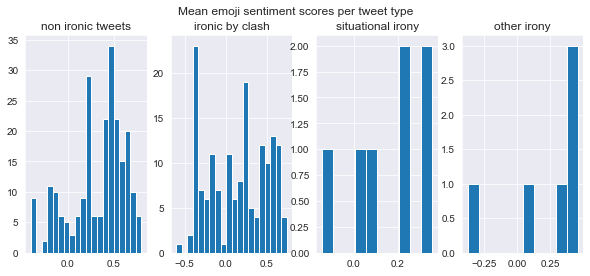

In [97]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 4))
fig.suptitle("Mean emoji sentiment scores per tweet type")

emoji_sentiment_scores = train_df[train_df["label"] == 0]["emoji_sentiment_scores"]
ax1.hist(emoji_sentiment_scores[emoji_sentiment_scores.notnull()], bins=20)
ax1.set_title("non ironic tweets")

emoji_sentiment_scores = train_df[train_df["label"] == 1]["emoji_sentiment_scores"]
ax2.hist(emoji_sentiment_scores[emoji_sentiment_scores.notnull()], bins=20)
ax2.set_title("ironic by clash")

train_emojis = train_df[train_df["label"] == 2]
train_emojis = train_emojis[train_emojis["emoji_count"] > 0]["emoji_sentiment_scores"]
ax3.hist(train_emojis)
ax3.set_title("situational irony")

train_emojis = train_df[train_df["label"] == 3]
train_emojis = train_emojis[train_emojis["emoji_count"] > 0]["emoji_sentiment_scores"]
ax4.hist(train_emojis)
ax4.set_title("other irony")

plt.show()

In [98]:
print("emoji sentiment score not ironic: ",
      np.nanmean(train_df[train_df["label"] == 0]["emoji_sentiment_scores"]))
print("emoji sentiment score ironic by clash: ",
      np.nanmean(train_df[train_df["label"] == 1]["emoji_sentiment_scores"]))
print("emoji sentiment score situational irony: ",
      np.nanmean(train_df[train_df["label"] == 2]["emoji_sentiment_scores"]))
print("emoji sentiment score other irony: ",
      np.nanmean(train_df[train_df["label"] == 3]["emoji_sentiment_scores"]))

emoji sentiment score not ironic:  0.32410815295815293
emoji sentiment score ironic by clash:  0.13608343904038347
emoji sentiment score situational irony:  0.15057142857142858
emoji sentiment score other irony:  0.21558333333333335


In [99]:
def remove_emojis(text):
    return "".join(c for c in text if c not in emoji.UNICODE_EMOJI['en'])

In [100]:
train_df_with_emojis_only = train_df[train_df["emoji_count"] > 0]
test_df_with_emojis_only = test_df[test_df["emoji_count"] > 0]

In [101]:
train_df_with_emojis_only_removed = train_df_with_emojis_only[["index", "label", "text"]].copy()
train_df_with_emojis_only_removed["text"] = train_df_with_emojis_only_removed["text"].apply(remove_emojis)

test_df_with_emojis_only_removed = test_df_with_emojis_only[["index", "label", "text"]].copy()
test_df_with_emojis_only_removed["text"] = test_df_with_emojis_only_removed["text"].apply(remove_emojis)

In [102]:
train_df.to_csv("datasets/train_task_b_full_analyzed.txt", sep="\t", index=False)
test_df.to_csv("datasets/test_task_b_full_analyzed.txt", sep="\t", index=False)

train_df_with_emojis_only.to_csv("datasets/train_task_b_only_with_emojis_analyzed.txt", sep="\t", index=False)
test_df_with_emojis_only.to_csv("datasets/test_task_b_only_with_emojis_analyzed.txt", sep="\t", index=False)

train_df_with_emojis_only_removed.to_csv("datasets/train_task_b_only_with_emojis_removed.txt", sep="\t", index=False)
test_df_with_emojis_only_removed.to_csv("datasets/test_task_b_only_with_emojis_removed.txt", sep="\t", index=False)